A.0.1.1 Per type (Standard Tournament)
-----------

For a given set of players four different type of tournaments have been performed, standard, noisy, probabilistic ending, noisy and probabilistic ending. Because in our experiment computer seed have been used the four tournaments for each seed share same parameters.

The same notation as in Section I will be used. Furthermore, here we define the highest cooperation rating in tournament $C^{*}_{r}$, the lowest cooperation rating in tournament  $\tilde{C_{r}}$, the normalised rank of highest cooperator $\bar{r_{C}}$, the normalised rank of lowest cooperator $\bar{r_{D}}$, 
the mean cooperation rating $\bar{C_{r}}$ and the median $\breve{C_{r}}$.

Each tournament type.

In [10]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import tools

%matplotlib inline

In [11]:
font = {'weight': 'bold',
        'size'   : 10}
matplotlib.rc('font', **font)

The structure of the analysis will be similar for all tournament types. More specifically we are looking at V sections of analysis. These include:

- I. the performance of the highest cooperator
    - what was the rank of the person with the $C^{*}_{r}$
- II. the performance of the lowest cooperator
    - what was the rank of the person with the $\tilde{C_{r}}$
- III. study the cooperating ratio of the winner $C_{W}$
    - against the ${C^{*}}_{r}$
    - against the $\tilde{C_{r}}$
    - against the $\bar{C_{r}}$
    - against the $\breve{C_{r}}$
- IV. study the cooperating ratio of the looser $C_{L}$
    - against the ${C^{*}}_{r}$
    - against the $\tilde{C_{r}}$
    - against the $\bar{C_{r}}$
    - against the $\breve{C_{r}}$
- V. the r distribution
    - the number of winners that cooperated more than the $r$ times of: 
        - ${C^{*}}_{r}$
        - $\tilde{C_{r}}$
        - $\bar{C_{r}}$
        - $\breve{C_{r}}$


Standard
--------

In [4]:
df = pd.read_csv('data/df.csv')

In [5]:
standar_tournaments = df[(df['noise'].isnull()) & (df['probend'].isnull())]

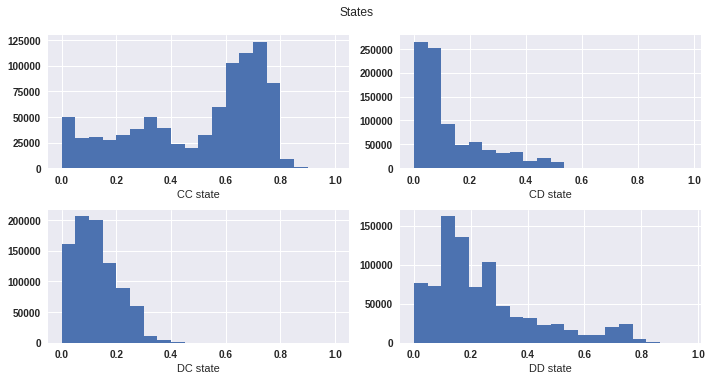

In [32]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 5))

fig.suptitle('States', y=1.05)
axes[0][0].hist(standar_tournaments['CC_rate'], bins=20); axes[0][0].set_xlabel('CC state')
axes[0][1].hist(standar_tournaments['CD_rate'], bins=20); axes[0][1].set_xlabel('CD state')

axes[1][0].hist(standar_tournaments['DC_rate'], bins=20); axes[1][0].set_xlabel('DC state')
axes[1][1].hist(standar_tournaments['DD_rate'], bins=20); axes[1][1].set_xlabel('DD state')
plt.tight_layout()

plt.show()

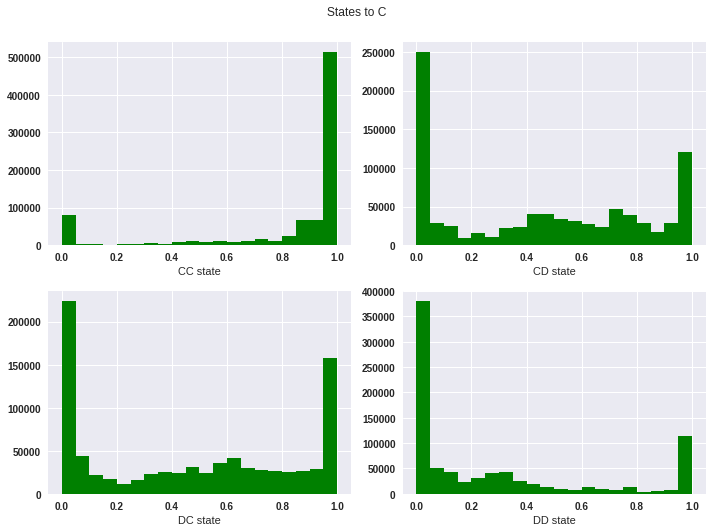

In [31]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 7))

fig.suptitle('States to C', y=1.05)

axes[0][0].hist(standar_tournaments['CC_to_C_rate'], bins=20, color='green'); axes[0][0].set_xlabel('CC state', )
axes[0][1].hist(standar_tournaments['CD_to_C_rate'], bins=20, color='green'); axes[0][1].set_xlabel('CD state', )

axes[1][0].hist(standar_tournaments['DC_to_C_rate'], bins=20, color='green'); axes[1][0].set_xlabel('DC state', )
axes[1][1].hist(standar_tournaments['DD_to_C_rate'], bins=20, color='green'); axes[1][1].set_xlabel('DD state',)
plt.tight_layout()
plt.show()

Fixed data set
--------------

In [33]:
df, name = pd.read_csv('data/standar_tournaments.csv'), 'standard'

In [34]:
df.columns

Index(['index', 'loser coop', 'max coop', 'mean coop', 'median coop',
       'min coop', 'norm rank C', 'norm rank D', 'size', 'std', 'winner coop'],
      dtype='object')

**I. Highest cooperator**

What was the performance of the highest cooperator ?

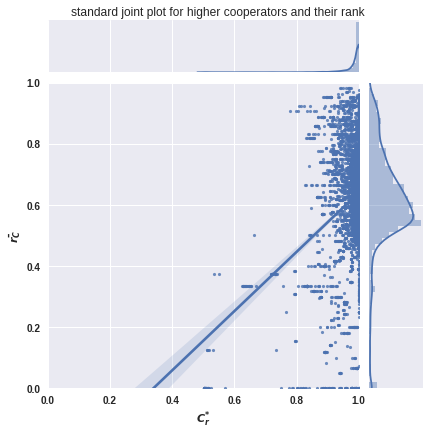

In [35]:
tools.violin_plot(df, 'max coop', 'norm rank C', r'$C^{*}_{r}$', 
                  r'$ \bar{r_{C}}$',  
                  '{} joint plot for higher cooperators and their rank'.format(name))

For the standard tournaments what is shown in the two joint plots (above and below), is that:

**1. The highest cooperators managed to win only a few tournaments, the most frequenced $\bar{r}$ was between 0.5 and 0.7**

**2. Similar for the least cooperative strategies, they managed to win only a small number of tournaments. And they mainly came last.**

**II. Lowest cooperator**

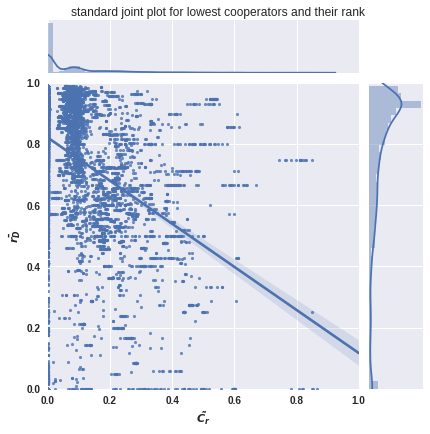

In [36]:
tools.violin_plot(df, 'min coop', 'norm rank D', r'$\tilde{C_{r}}$', 
                  r'$ \bar{r_{D}}$',  
                  '{} joint plot for lowest cooperators and their rank'.format(name))

**III. Winners of the tournaments**

What can we tell about the cooperating ratio of the winner $C_{W}$, compared to their enviroment?

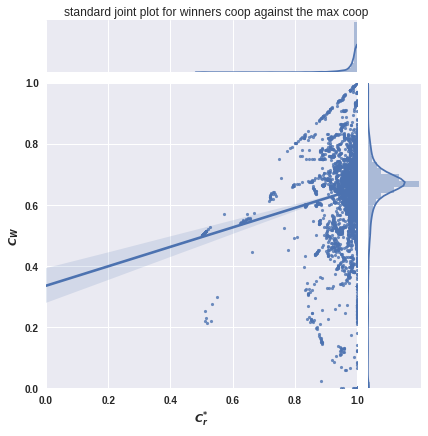

In [37]:
# winner vs max coop
tools.violin_plot(df, 'max coop','winner coop', r'$C^{*}_{r}$', r'$C_{W}$',   
                  '{} joint plot for winners coop against the max coop'.format(name), size=10)

From the two joint plots we can tell the following things. 

**1. The have been winners, in the standard tournaments, when the players has been both the most and the least cooperative. Though, there seem to be more point in the straight line for when the player has been the least cooperative. Overall, the winner seem to be having a $C_{r}$ of 0.6.** 

**2. and when the winner had a $C_{r}$ of 0.6, in the tournament there have been full cooperators ($C_{r}=1$) and defectors ($C_{r}=0.0$)**

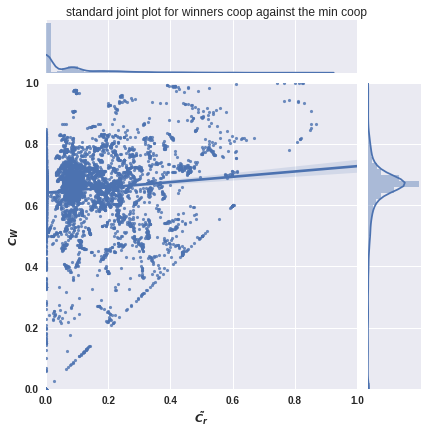

In [38]:
# winner vs min coop
tools.violin_plot(df, 'min coop','winner coop', r'$\tilde{C_{r}}$', 
                  r'$C_{W}$',  
                  '{} joint plot for winners coop against the min coop'.format(name))

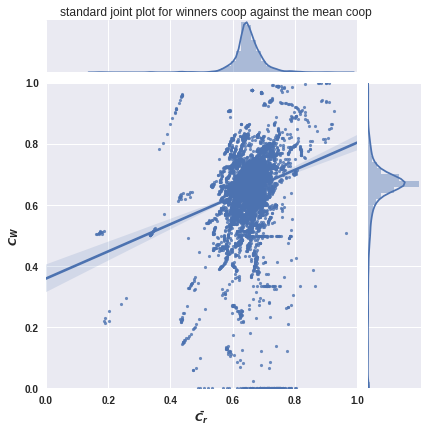

In [39]:
# winner vs mean coop
tools.violin_plot(df, 'mean coop','winner coop', r'$\bar{C_{r}}$', 
                  r'$C_{W}$',  
                  '{} joint plot for winners coop against the mean coop'.format(name))

**Both the mean and median plot show that our results above hold when the enviroment of our standard tournaments has been a bit more than 0.5 ($\simeq 0.6$).**

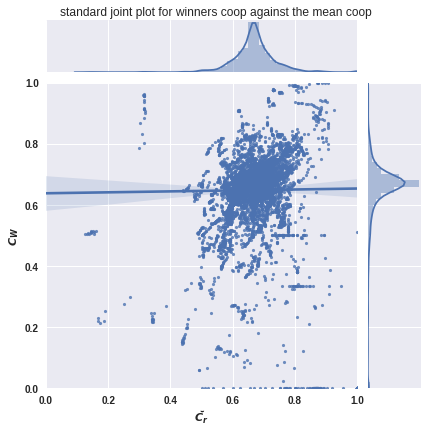

In [40]:
# winner vs median coop
tools.violin_plot(df, 'median coop','winner coop', r'$\breve{C_{r}}$', 
                  r'$C_{W}$',  
                  '{} joint plot for winners coop against the mean coop'.format(name))

**IV. The losers**

What can we tell about the cooperating ratio of the loser $C_{L}$, compared to their enviroment?

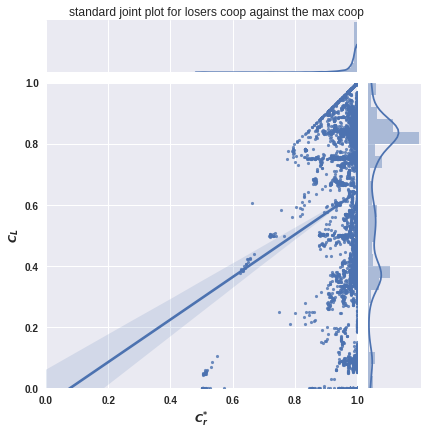

In [41]:
# loser vs max coop
tools.violin_plot(df, 'max coop','loser coop', r'$C^{*}_{r}$', r'$C_{L}$',   
                  '{} joint plot for losers coop against the max coop'.format(name))

For our losers, in the standard tournaments, we can see as well that they have been **1. both the most and the least cooperative players for a number of tournaments.**

But overall **2. our losers have had mainly a $C_{r}$ of 0.8.**

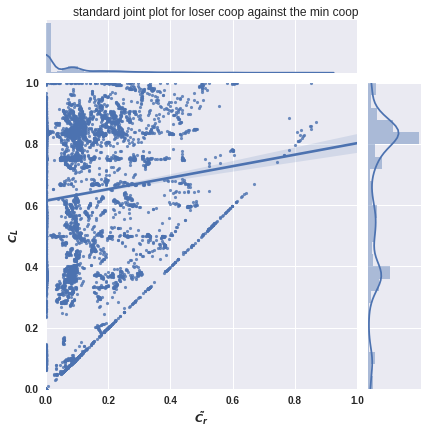

In [42]:
# loser vs min coop
tools.violin_plot(df, 'min coop','loser coop', r'$\tilde{C_{r}}$', 
                  r'$C_{L}$',  
                  '{} joint plot for loser coop against the min coop'.format(name))

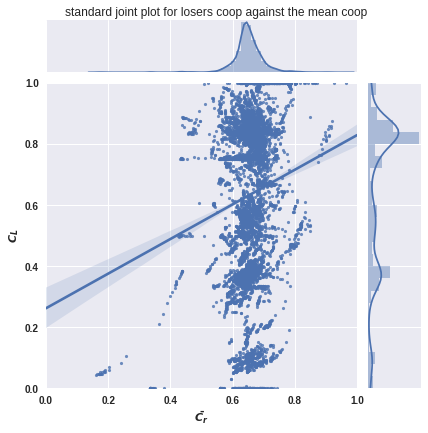

In [43]:
# loser vs mean coop
tools.violin_plot(df, 'mean coop','loser coop', r'$\bar{C_{r}}$', 
                  r'$C_{L}$',  
                  '{} joint plot for losers coop against the mean coop'.format(name))

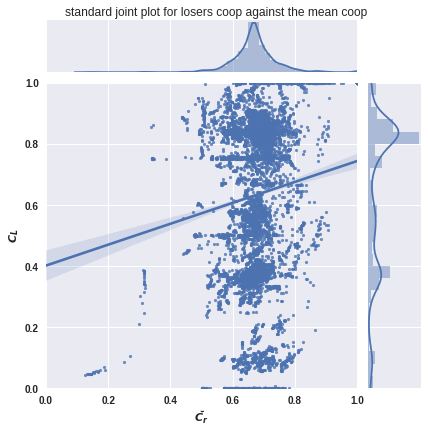

In [44]:
# loser vs median coop
tools.violin_plot(df, 'median coop','loser coop', r'$\breve{C_{r}}$', 
                  r'$C_{L}$',  
                  '{} joint plot for losers coop against the mean coop'.format(name))

**V. $r$ distribution**

What is the $r-$ distribution?

The $r-$ distribution is plotting the number of times the winner had a $C_{W}$ greater than the $r \times x$.

for $x$ is $C^{*}, \tilde{C}, \bar{C}, \breve{C}$

The following plot is showing the following:
    
- The winner always had greater $C$ than the most defector
- In a standard tournament you would want to be just a bit more cooperative than the half $C$ of the $C^{*}$
- when you are just a bit less cooperative ($\simeq 0.8$) than the mean/median $C$. 

/home/nightwing/anaconda3/envs/axlml/lib/python3.5/site-packages/matplotlib/cbook.py:136: MatplotlibDeprecationWarning: The set_color_cycle attribute was deprecated in version 1.5. Use set_prop_cycle instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


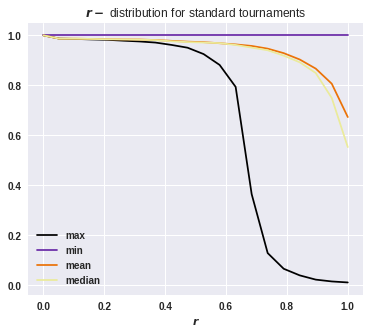

In [46]:
tools.r_distribution(df['winner coop'], df['max coop'], df['min coop'], df['mean coop'], 
                     df['median coop'], title='$r-$ distribution for {} tournaments'.format(name))